<a href="https://colab.research.google.com/github/selinxxA/Pusula_Selin_Erman/blob/main/Pusula_Staj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel("/content/Talent_Academy_Case_DT_2025.xlsx")


# Sütun bazında eksik değer sayısı
print(df.isna().sum())
# Satır bazında eksik değer sayısı
print(df.isna().sum(axis=1).head())

HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64
0    0
1    1
2    1
3    1
4    1
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Uyruk            2235 non-null   int64 
 3   KronikHastalik   1624 non-null   object
 4   Bolum            2224 non-null   object
 5   Tanilar          2160 non-null   object
 6   TedaviAdi        2235 non-null   object
 7   UygulamaYerleri  2014 non-null   object
 8   tanilar_norm     2235 non-null   object
 9   Tedavi_suresi    2235 non-null   int64 
 10  Uygulama_suresi  2235 non-null   int64 
 11  ARVELES          2235 non-null   int64 
 12  CORASPIN         2235 non-null   int64 
 13  GRIPIN           2235 non-null   int64 
 14  NOVALGIN         2235 non-null   int64 
 15  POLEN            2235 non-null   int64 
 16  Sucuk            2235 non-null   int64 
 17  TOZ              2235 non-null   

In [ ]:
df['Yas'].describe()

,Yas
count,2235.000000
mean,47.327069
std,15.208634
min,2.000000
25%,38.000000
50%,46.000000
75%,56.000000
max,92.000000


In [ ]:
df['Cinsiyet'].value_counts()

,count
Cinsiyet,
Kadın,1274
Erkek,792


In [ ]:
df['KanGrubu'].value_counts()

,count
KanGrubu,
0 Rh+,579
A Rh+,540
B Rh+,206
AB Rh+,80
B Rh-,68
A Rh-,53
0 Rh-,26
AB Rh-,8


In [ ]:
df['Uyruk'].value_counts()

,count
Uyruk,
Türkiye,2173
Tokelau,27
Arnavutluk,13
Azerbaycan,12
Libya,10


In [ ]:
df['KronikHastalik'].value_counts()

,count
KronikHastalik,
Myastenia gravis,38
Aritmi,36
Fascioscapulohumeral Distrofi,36
Hipertiroidizm,34
"Limb-Girdle Musküler Distrofi, Astım",34
...,...
"Fascioscapulohumeral Distrofi, Myastenia gravis",1
"Polimiyozit, Aritmi, Hiportiroidizm",1
"Aritmi, Diyabet, Kalp yetmezliği, Hiportiroidizm",1


In [ ]:
unique_diseases = set(
    disease.strip()  # boşlukları temizle
    for row in df["KronikHastalik"].dropna()
    for disease in row.split(",")
)
df["KronikHastalik"] = df["KronikHastalik"].str.replace("Hiportiroidizm", "Hipotirodizm", case=False)
print("Farklı hastalık sayısı:", len(unique_diseases))
print("Hastalık listesi:", unique_diseases)

Farklı hastalık sayısı: 15
Hastalık listesi: {'Kalp yetmezliği', 'Hipertansiyon', 'Fascioscapulohumeral Distrofi', 'Limb-Girdle Musküler Distrofi', 'Polimiyozit', 'Guatr', 'Myastenia gravis', 'Diyabet', 'Astım', 'Hipotirodizm', 'Duchenne Musküler Distrofisi', 'Hiportiroidizm', 'Becker Musküler Distrofisi', 'Aritmi', 'Hipertiroidizm'}


In [ ]:
df['Bolum'].value_counts()

,count
Bolum,
"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",2045
Ortopedi Ve Travmatoloji,88
İç Hastalıkları,32
Nöroloji,17
Kardiyoloji,11
Göğüs Hastalıkları,8
Laboratuar,7
Genel Cerrahi,6
Tıbbi Onkoloji,6


In [ ]:
unique_diseases = set(
    disease.strip()  # boşlukları temizle
    for row in df["Bolum"].dropna()
    for disease in row.split(",")
)

print("Farklı bölüm sayısı:", len(unique_diseases))
print("Bölüm listesi:", unique_diseases)

Farklı bölüm sayısı: 11
Bölüm listesi: {'Laboratuar', 'Solunum Merkezi', 'İç Hastalıkları', 'Nöroloji', 'Kardiyoloji', 'Ortopedi Ve Travmatoloji', 'Tıbbi Onkoloji', 'Kalp Ve Damar Cerrahisi', 'Göğüs Hastalıkları', 'Genel Cerrahi', 'Fiziksel Tıp Ve Rehabilitasyon'}


In [ ]:
df['Alerji'].value_counts()

,count
Alerji,
Polen,198
POLEN,134
Toz,119
"ARVELES,CORASPIN",102
Sucuk,91
NOVALGIN,90
"Polen,Yer Fıstığı",83
TOZ,74
SUCUK,73


In [ ]:
df["Alerji"] = df["Alerji"].str.replace("Novalgin", "NOVALGIN", case=False)
df["Alerji"] = df["Alerji"].str.replace("SUCUK", "Sucuk", case=False)
df["Alerji"] = df["Alerji"].str.replace("Polen", "POLEN", case=False)
df["Alerji"] = df["Alerji"].str.replace("GRİPİN", "GRIPIN", case=False)
df["Alerji"] = df["Alerji"].str.replace("Voltaren", "VOLTAREN", case=False)
df["Alerji"] = df["Alerji"].str.replace("Volteren", "VOLTAREN", case=False)

df["Alerji"] = df["Alerji"].str.replace("Toz", "TOZ", case=False)

unique_diseases = set(
    disease.strip()  # boşlukları temizle
    for row in df["Alerji"].dropna()
    for disease in row.split(",")
)

print("Farklı alerji sayısı:", len(unique_diseases))
print("Alerji listesi:", unique_diseases)

Farklı alerji sayısı: 9
Alerji listesi: {'POLEN', 'VOLTAREN', 'NOVALGIN', 'Sucuk', 'TOZ', 'GRIPIN', 'Yer Fıstığı', 'ARVELES', 'CORASPIN'}


In [ ]:
df['Tanilar'].value_counts()

,count
Tanilar,
"DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE",149
Omuzun darbe sendromu,128
"İntervertebral disk bozuklukları, tanımlanmamış",116
"DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",96
Eklem ağrısı,51
...,...
"Kas bozuklukları,, başka yerde sınıflanmış hastalıklarda, Spinal stenoz",1
"Menisküs yırtığı, şimdiki ,Kondromalazia patella",1
"Omuzun darbe sendromu,Menisküs yırtığı, şimdiki",1


In [ ]:
import re

def normalize(text):
    if not isinstance(text, str) or text.strip() == "":
        return "diğer"
    # Küçük harf yap, baş/son boşlukları temizle
    text = text.lower().strip()
    # Görünmez karakterleri temizle
    text = re.sub(r"[\u200b\u200d\u00ad\u00a0_\x00-\x1f]", "", text)
    return text

df["tanilar_norm"] = df["Tanilar"].apply(normalize)


unique_diseases = set(
    disease.strip()  # boşlukları temizle
    for row in df["Tanilar"].dropna()
    for disease in row.split(",")
)

print("Farklı tanı sayısı:", len(unique_diseases))
print("Tanı listesi:", unique_diseases)

Farklı tanı sayısı: 294
Tanı listesi: {'', 'PELV`IK BÖLGE VE KALÇA', 'Sternoklavikuler eklem burkulma ve gerilmesi', 'Meme malign neoplazmı', 'TANIMLANMAMIŞ', 'kapalı', 'başka yerde sınıflanmış diğer hastalıklarda', 'Hipotroidizm', 'Dermatofitoz', 'Anksiyete bozukluğu', 'Viral enfeksiyonlar', 'Spondilolistezis', 'Omuz lezyonları', '\u200bAlgonörodistrofi', 'tanımlanmış virüs', 'Vitaminlerin eksikliği', 'Miyopatiler', 'Spastik hemipleji', 'Stres kırığı', 'peritoneal apse ile', 'Temporomandibüler eklem bozuklukları', 'Lateral malleol kırığı', 'Ayak bileği ve ayak düzeyinde eklem ve ligamentlerin çıkık', 'Femur kırığı', 'Kasın diğer rüptürü (travmatik olmayan)', 'Eklemin diğer instabilitesi', 'Epilepsi', 'Solunum yetmezliği', 'Vitamin D eksikliği', 'omuz bölgesi', 'DORSALJİ', 'Koksartro\u200dz', 'Halluks valgus (kazanılmış)', 'Esansiyel (primer) hipertansiyon', 'İliotibial band sendromu', 'Ekstremite ağrısı', 'İşemede diğer zorluklar', 'Diğer yumuşak doku bozuklukları', 'Genel tıbbi muaye

In [ ]:
df['TedaviAdi'].value_counts()

,count
TedaviAdi,
Dorsalji -Boyun+trapez,231
İV DİSK BOZUKLUĞU-BEL,200
Dorsalji 1,140
Dorsalji-Bel,120
Gonartroz-Meniskopati,95
...,...
Aşil Tendiniti sol-1,1
Koksartroz1-1,1
Hemartrotik Diz-Kas Kuvvetlendirme Egzersizi,1


In [ ]:
unique_diseases = set(
    disease.strip()  # boşlukları temizle
    for row in df["TedaviAdi"].dropna()
    for disease in row.split(",")
)

print("Farklı tedavi sayısı:", len(unique_diseases))
print("Tedavi listesi:", unique_diseases)

Farklı tedavi sayısı: 244
Tedavi listesi: {'', 'Dorsalji -Boyun+trapez', 'Triseps tendiniti-2', 'Alt ekstremite atrofi-Bilateral', 'Ön çapraz bağ rehabilitasyonu', 'Dorsalji 1', 'Diz Op-Erken Rehabilitasyon', 'Düşük ayak', 'Ayak bileği Post OP', 'Femur uzatma op', 'El rehabilitasyon programı-ROM Egzersizi (eklem hareket açıklığı egzersizi)', 'aşil ameliyatı erken', 'Spondilolistezis', 'El rehabilitasyonu-El Rehabilitasyonu', 'Dorsalji -Boyun+trapez+skapular', 'Dorsalji-Dorsal', 'DİZ PROTEZİ SONRASI TAM  YÜK', 'Sağ ayak 1. parmak ravmatik yaralanması', 'Hemartrotik Diz-Kas Kuvvetlendirme Egzersizi', 'Metakarp kırığı El rehabilitasyonu', 'İV Disk Boyun', 'Lenfödem+ekstremite ağrısı', 'Plantar fasiit Sağ-2', 'Patella Yerleşim Boz', 'Omuz Post Op İzometrik', 'Sağ el bilek ağrıs', 'Muscular strain', 'Diz Menisküs', 'Kalça + bel  ağrısı', 'Gonartroz-Meniskopati + kalkaneal Spur', 'Plantar fasiit', 'Sağ subtrokanterik kırık', 'Koksartroz1-2', 'Humerus kırığı', 'SAĞ OMUZ İMPİNGEMENT', 'Epikond

In [ ]:
# Sütun adlarını temizle
df.columns = df.columns.str.strip()

# 'TedaviSuresi' sütunundaki rakamları çekip int'e dönüştür
df["Tedavi_suresi"] = df["TedaviSuresi"].astype(str).str.extract(r"(\d+)")[0].astype(int)

# Sonucu kontrol et
print(df["Tedavi_suresi"])
df.drop(columns=['TedaviSuresi'], inplace=True)

0        5
1       15
2       15
3       15
4       15
        ..
2230    15
2231    15
2232    15
2233    15
2234    15
Name: Tedavi_suresi, Length: 2235, dtype: int64


In [ ]:
df['Tedavi_suresi'].describe()

,Tedavi_suresi
count,2235.000000
mean,14.570917
std,3.725322
min,1.000000
25%,15.000000
50%,15.000000
75%,15.000000
max,37.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  UygulamaYerleri  2014 non-null   object
 11  UygulamaSuresi   2235 non-null   object
 12  tanilar_norm     2235 non-null   object
 13  Tedavi_suresi    2235 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 244.6+ KB


In [ ]:
df['KanGrubu'].isnull().value_counts()

,count
KanGrubu,
False,1560
True,675


In [ ]:
df["KanGrubu"] = df.groupby("HastaNo")["KanGrubu"].transform(lambda x: x.ffill().bfill())
df['KanGrubu'].isnull().value_counts()

/tmp/ipython-input-2382354413.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["KanGrubu"] = df.groupby("HastaNo")["KanGrubu"].transform(lambda x: x.ffill().bfill())


,count
KanGrubu,
False,1591
True,644


In [ ]:
df['Cinsiyet'].isnull().value_counts()

,count
Cinsiyet,
False,2066
True,169


In [ ]:
df["Cinsiyet"] = df.groupby("HastaNo")["Cinsiyet"].transform(lambda x: x.ffill().bfill())
df['Cinsiyet'].isnull().value_counts()

/tmp/ipython-input-518176957.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Cinsiyet"] = df.groupby("HastaNo")["Cinsiyet"].transform(lambda x: x.ffill().bfill())


,count
Cinsiyet,
False,2090
True,145


In [ ]:
df['UygulamaYerleri'].value_counts()

,count
UygulamaYerleri,
Bel,528
Boyun,363
Diz,177
Sol Omuz Bölgesi,137
Sağ Omuz Bölgesi,127
Sol El Bilek Bölgesi,83
Sırt,75
Sağ Ayak Bileği Bölgesi,61
Sol Ayak Bileği Bölgesi,58


In [ ]:
unique_diseases = set(
    disease.strip()  # boşlukları temizle
    for row in df["UygulamaYerleri"].dropna()
    for disease in row.split(",")
)

print("Farklı tedavi sayısı:", len(unique_diseases))
print("Tedavi listesi:", unique_diseases)

Farklı tedavi sayısı: 23
Tedavi listesi: {'Sol El Bilek Bölgesi', 'Sırt', 'Omuz', 'Bel', 'Sol Diz Bölgesi', 'Sağ Dirsek Bölgesi', 'Dirsek', 'Sol Kalça Bölgesi', 'Sağ Kalça Bölgesi', 'El Bilek', 'Sağ Diz Bölgesi', 'Sol Ayak Bileği Bölgesi', 'Sağ Omuz Bölgesi', 'Kalça', 'Yüz', 'Sol Omuz Bölgesi', 'Ayak Bileği', 'Sağ Ayak Bileği Bölgesi', 'Boyun', 'Diz', 'Tüm Vücut Bölgesi', 'Sağ El Bilek Bölgesi', 'Sol Dirsek Bölgesi'}


In [ ]:
df['UygulamaSuresi'].describe()

,UygulamaSuresi
count,2235
unique,10
top,20 Dakika
freq,1535


In [ ]:
# Sütun adlarını temizle
df.columns = df.columns.str.strip()

# 'TedaviSuresi' sütunundaki rakamları çekip int'e dönüştür
df["Uygulama_suresi"] = df["UygulamaSuresi"].astype(str).str.extract(r"(\d+)")[0].astype(int)

# Sonucu kontrol et
print(df["Uygulama_suresi"])
df.drop(columns=['UygulamaSuresi'], inplace=True)

0       20
1       20
2       20
3        5
4       20
        ..
2230    10
2231    20
2232    20
2233    15
2234     5
Name: Uygulama_suresi, Length: 2235, dtype: int64


In [ ]:
df['Uygulama_suresi'].describe()

,Uygulama_suresi
count,2235.000000
mean,16.573154
std,6.268635
min,3.000000
25%,10.000000
50%,20.000000
75%,20.000000
max,45.000000


Boxplot Grafikleri

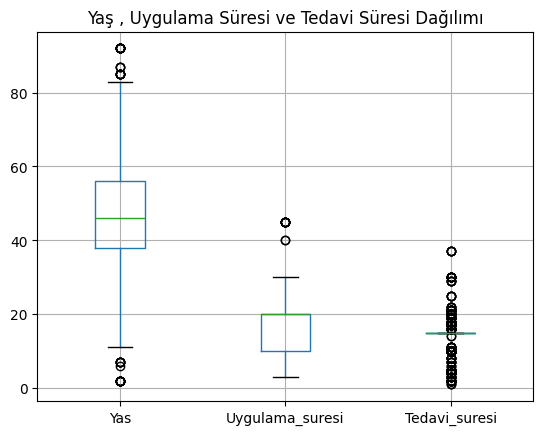

In [ ]:
df[["Yas","Uygulama_suresi","Tedavi_suresi"]].boxplot()
plt.title("Yaş , Uygulama Süresi ve Tedavi Süresi Dağılımı")
plt.show()

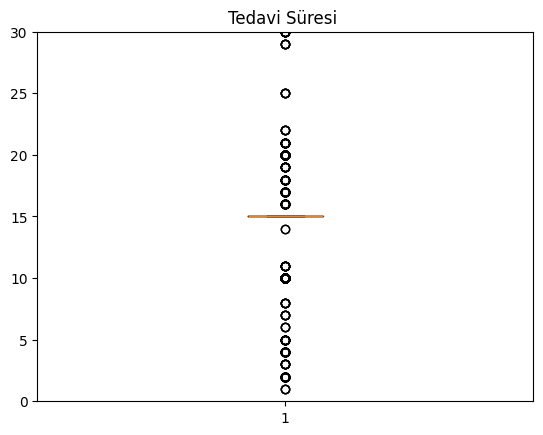

In [ ]:

plt.boxplot(df["Tedavi_suresi"])
plt.ylim(0,30)
plt.title("Tedavi Süresi ")
plt.show()

Histogram

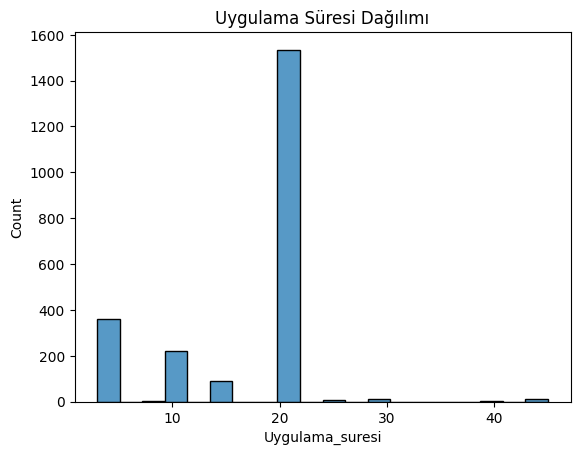

In [ ]:
sns.histplot(df["Uygulama_suresi"], bins=20, kde=False)
plt.title("Uygulama Süresi Dağılımı")
plt.show()

In [ ]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,UygulamaYerleri,tanilar_norm,Tedavi_suresi,Uygulama_suresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hipotirodizm, Kalp...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,Ayak Bileği,ayak bileği ve ayağın yüzeysel yaralanması,5,20
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",15,20
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt","omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",15,20
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",15,5
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt","omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",15,20


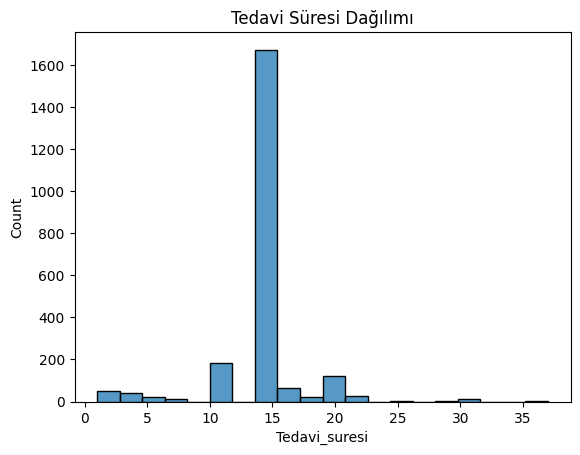

In [ ]:
sns.histplot(df["Tedavi_suresi"], bins=20, kde=False)
plt.title("Tedavi Süresi Dağılımı")
plt.show()

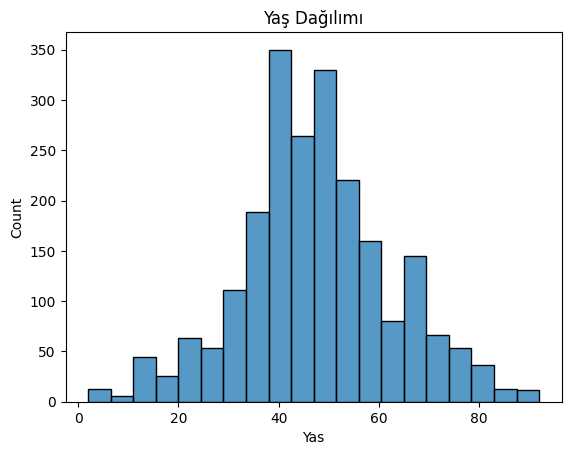

In [ ]:
sns.histplot(df["Yas"], bins=20, kde=False)
plt.title("Yaş Dağılımı")
plt.show()

In [ ]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,UygulamaYerleri,tanilar_norm,Tedavi_suresi,Uygulama_suresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hipotirodizm, Kalp...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,Ayak Bileği,ayak bileği ve ayağın yüzeysel yaralanması,5,20
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",15,20
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt","omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",15,20
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",15,5
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt","omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",15,20


In [ ]:
df["Alerji"] = df["Alerji"].fillna("Unknown")
df_unique = df.groupby("HastaNo")["Alerji"].apply(lambda x: ",".join(x.unique())).reset_index()
# One-Hot Encoding
df_allergy = df["Alerji"].str.get_dummies(sep=",")

allergy_counts = df_allergy.sum().sort_values(ascending=False)




KeyError: 'Alerji'

In [ ]:
df.drop(columns=['Alerji'], inplace=True)
df=pd.concat([df, df_allergy], axis=1)

In [ ]:
df.drop(columns=['Unknown'], inplace=True)
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Tanilar,TedaviAdi,UygulamaYerleri,...,Uygulama_suresi,ARVELES,CORASPIN,GRIPIN,NOVALGIN,POLEN,Sucuk,TOZ,VOLTAREN,Yer Fıstığı
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hipotirodizm, Kalp...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,Ayak Bileği,...,20,0,0,0,0,0,0,1,0,0
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,...,20,0,0,0,0,0,0,0,0,0
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt",...,20,0,0,0,0,0,0,0,0,0
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,...,5,0,0,0,0,0,0,0,0,0
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt",...,20,0,0,0,0,0,0,0,0,0


In [ ]:
df["Cinsiyet_binary"] = np.where(df["Cinsiyet"].isna(), 2,
                                 np.where(df["Cinsiyet"] == "Erkek", 1, 0))

In [ ]:
df.drop(columns=['Cinsiyet'], inplace=True)

In [ ]:
df.head()

,HastaNo,Yas,KanGrubu,Uyruk,KronikHastalik,Bolum,Tanilar,TedaviAdi,UygulamaYerleri,tanilar_norm,...,ARVELES,CORASPIN,GRIPIN,NOVALGIN,POLEN,Sucuk,TOZ,VOLTAREN,Yer Fıstığı,Cinsiyet_binary
0,145134,60,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hipotirodizm, Kalp...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,Ayak Bileği,ayak bileği ve ayağın yüzeysel yaralanması,...,0,0,0,0,0,0,1,0,0,0
1,145135,28,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",...,0,0,0,0,0,0,0,0,0,1
2,145135,28,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt","omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",...,0,0,0,0,0,0,0,0,0,1
3,145135,28,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",...,0,0,0,0,0,0,0,0,0,1
4,145135,28,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt","omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",...,0,0,0,0,0,0,0,0,0,1


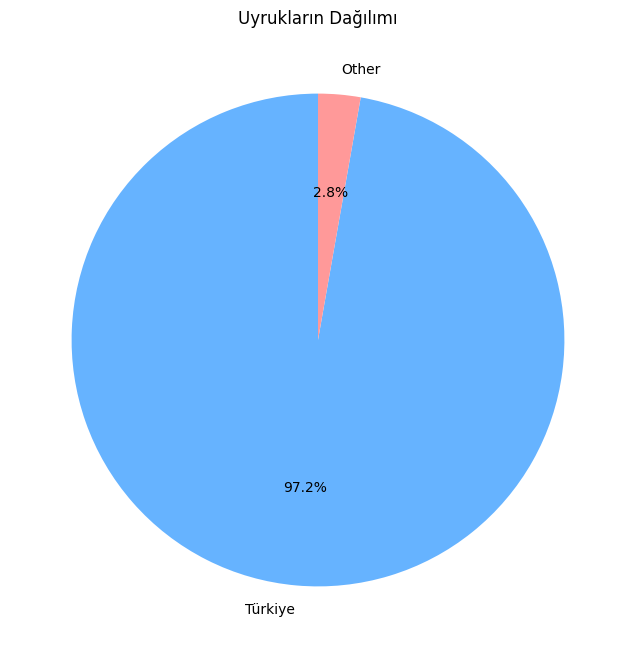

In [ ]:
frekans = df['Uyruk'].value_counts()

turkiye = frekans.get('Türkiye', 0)
other = frekans.sum() - turkiye
veri = pd.Series([turkiye, other], index=['Türkiye', 'Other'])

plt.figure(figsize=(8,8))
plt.pie(veri, labels=veri.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Uyrukların Dağılımı")
plt.show()

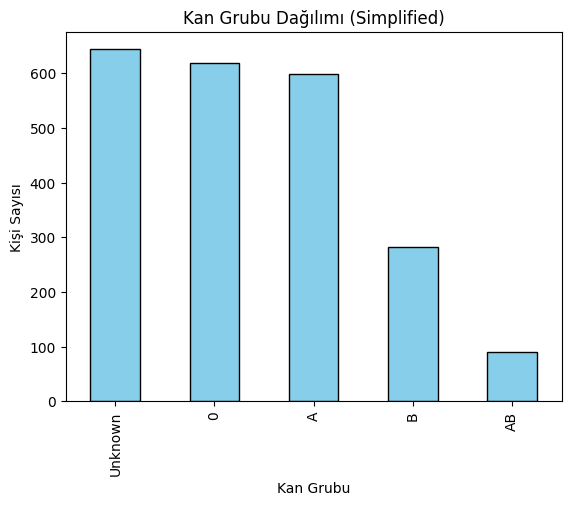

In [ ]:
from sklearn.preprocessing import LabelEncoder

def simplify_blood_group(x):
    if pd.isna(x):
        return "Unknown"
    x = str(x)
    if "0" in x:
        return "0"
    elif "A " in x and "B" not in x:
        return "A"
    elif "B " in x and "A" not in x:
        return "B"
    elif "AB" in x:
        return "AB"
    else:
        return "Other"

df["KanGrubuSimplified"] = df["KanGrubu"].apply(simplify_blood_group)


df_onehot = pd.get_dummies(df["KanGrubuSimplified"], prefix="Kan")




In [ ]:
df.head()

,HastaNo,Yas,KanGrubu,Uyruk,KronikHastalik,Bolum,Tanilar,TedaviAdi,UygulamaYerleri,tanilar_norm,...,CORASPIN,GRIPIN,NOVALGIN,POLEN,Sucuk,TOZ,VOLTAREN,Yer Fıstığı,Cinsiyet_binary,KanGrubuSimplified
0,145134,60,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hipotirodizm, Kalp...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,Ayak Bileği,ayak bileği ve ayağın yüzeysel yaralanması,...,0,0,0,0,0,1,0,0,0,0
1,145135,28,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",...,0,0,0,0,0,0,0,0,1,0
2,145135,28,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt","omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",...,0,0,0,0,0,0,0,0,1,0
3,145135,28,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",...,0,0,0,0,0,0,0,0,1,0
4,145135,28,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt","omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.drop(columns=['KanGrubu',"KanGrubuSimplified"], inplace=True)

KeyError: "['KanGrubu', 'KanGrubuSimplified'] not found in axis"

In [ ]:
df_onehot.head()

,Kan_0,Kan_A,Kan_AB,Kan_B,Kan_Unknown
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False


In [ ]:
df=pd.concat([df, df_onehot], axis=1)

In [ ]:
df['Uyruk'].value_counts()

,count
Uyruk,
Türkiye,2173
Tokelau,27
Arnavutluk,13
Azerbaycan,12
Libya,10


In [ ]:
df["Uyruk"] = df["Uyruk"].map(lambda x: 1 if x == "Türkiye" else 0)
df.head()

,HastaNo,Yas,Uyruk,KronikHastalik,Bolum,Tanilar,TedaviAdi,UygulamaYerleri,tanilar_norm,Tedavi_suresi,...,Sucuk,TOZ,VOLTAREN,Yer Fıstığı,Cinsiyet_binary,Kan_0,Kan_A,Kan_AB,Kan_B,Kan_Unknown
0,145134,60,1,"Becker Musküler Distrofisi, Hipotirodizm, Kalp...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,Ayak Bileği,ayak bileği ve ayağın yüzeysel yaralanması,5,...,0,1,0,0,0,True,False,False,False,False
1,145135,28,1,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",15,...,0,0,0,0,1,True,False,False,False,False
2,145135,28,1,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt","omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",15,...,0,0,0,0,1,True,False,False,False,False
3,145135,28,1,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",15,...,0,0,0,0,1,True,False,False,False,False
4,145135,28,1,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt","omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",15,...,0,0,0,0,1,True,False,False,False,False


In [ ]:
df['Uyruk'].value_counts()

,count
Uyruk,
1,2173
0,62


In [ ]:
df.columns

Index(['HastaNo', 'Yas', 'Uyruk', 'KronikHastalik', 'Bolum', 'Tanilar',
       'TedaviAdi', 'UygulamaYerleri', 'tanilar_norm', 'Tedavi_suresi',
       'Uygulama_suresi', 'ARVELES', 'CORASPIN', 'GRIPIN', 'NOVALGIN', 'POLEN',
       'Sucuk', 'TOZ', 'VOLTAREN', 'Yer Fıstığı', 'Cinsiyet_binary', 'Kan_0',
       'Kan_A', 'Kan_AB', 'Kan_B', 'Kan_Unknown'],
      dtype='object')

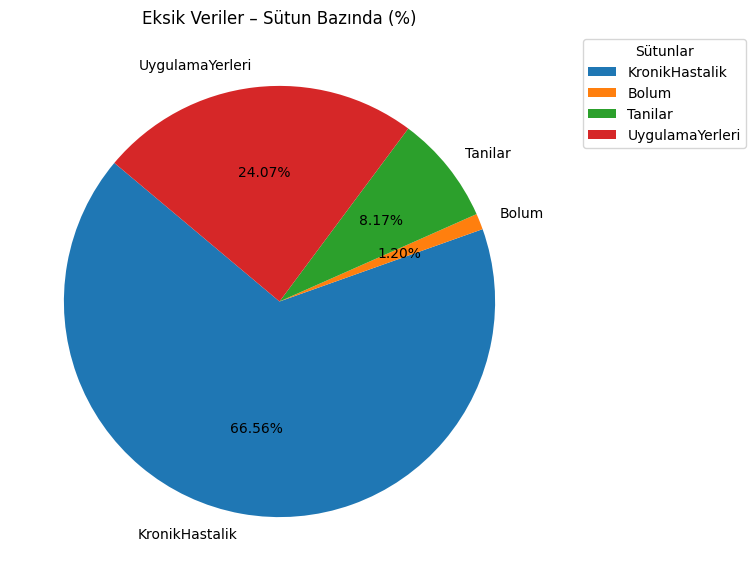

In [ ]:


# Eksik değer sayısı ve oranı
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0]  # sadece eksik olan sütunlar
missing_percent = (missing_counts / len(df) * 100).round(2)

# Daire grafiği
plt.figure(figsize=(7,7))
plt.pie(
    missing_counts,
    labels=missing_counts.index,
    autopct=lambda p: f'{p:.2f}%',
    startangle=140
)
plt.title("Eksik Veriler – Sütun Bazında (%)")
plt.legend(missing_counts.index, title="Sütunlar", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



Tüm eksik verileri doldur unknow

In [ ]:
# Eksik değerleri "unknown" ile doldur
data_filled = df.fillna("unknown")  # Tüm DataFrame'deki tüm NaN'ları doldurur
# Yeni CSV dosyası olarak kaydet
data_filled.to_csv("/content/Talent_Academy_Case_DT_2025_filled.csv", index=False)

Kategorik sütunlarda tutarsız yazım varsa düzelt

In [ ]:
import pandas as pd
from collections import Counter
import re

# unknow eklenmiş cvs kullan
df = pd.read_csv('/content/Talent_Academy_Case_DT_2025_filled.csv')

# Kategorik sütunları belirle
cat_cols = ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik','Bolum', 'Alerji', 'Tanilar','TedaviAdi','TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi']

def find_majority_format(series):
    """
    Bir serideki en yaygın yazım formatını bulur
    """
    # NaN değerleri filtrele
    clean_series = series.dropna()
    if len(clean_series) == 0:
        return None

    # Yazım formatlarını analiz et
    formats = []
    for value in clean_series:
        value_str = str(value)
        # Yazım formatını karakterize et
        if value_str.isupper():
            formats.append('UPPER')
        elif value_str.islower():
            formats.append('lower')
        elif value_str.istitle():
            formats.append('Title')
        else:
            formats.append('Mixed')

    # En yaygın formatı bul
    format_counts = Counter(formats)
    majority_format = format_counts.most_common(1)[0][0]

    return majority_format

def correct_to_majority_format(series):
    """
    Serideki tüm değerleri çoğunluk formatına dönüştürür
    """
    majority_format = find_majority_format(series)
    if majority_format is None:
        return series

    print(f"Çoğunluk formatı: {majority_format}")

    # Formatı düzelt
    if majority_format == 'UPPER':
        return series.apply(lambda x: str(x).upper() if pd.notna(x) else x)
    elif majority_format == 'lower':
        return series.apply(lambda x: str(x).lower() if pd.notna(x) else x)
    elif majority_format == 'Title':
        return series.apply(lambda x: str(x).title() if pd.notna(x) else x)
    else:
        # Mixed format için özel işlem
        return series.apply(lambda x: str(x).title() if pd.notna(x) else x)

# Her kategorik sütun için işlemi uygula
for col in cat_cols:
    if col in df.columns:
        print(f"{col} sütunu işleniyor...")

        # Önce temel temizlik
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True)

        # Çoğunluğa uyum sağla
        df[col] = correct_to_majority_format(df[col])

        # Özel durumlar için ek düzeltmeler
        if col == 'KanGrubu':
            # Kan grubu özel formatı: 'O Rh+' veya 'AB Rh-' formatına getir
            df[col] = df[col].str.upper()
            df[col] = df[col].str.replace(r'\s+', '', regex=True)  # Boşlukları kaldır
            df[col] = df[col].str.replace('RH', 'Rh')  # RH → Rh
            df[col] = df[col].str.replace('0', 'O')  # 0 → O (sıfır yerine O harfi)

            # Standart formata getir: 'O Rh+'
            df[col] = df[col].apply(lambda x: re.sub(r'([ABO]+)(Rh[+-])', r'\1 \2', x) if pd.notna(x) else x)

        print(f"{col} sütunu düzeltme tamamlandı.")
        print("Örnek değerler:", df[col].unique()[:5])
        print("-" * 50)

# Düzeltilmiş veriyi kaydet
df.to_csv('Talent_Academy_Case_DT_2025_standardized.csv', index=False)
print("Tüm yazım düzeltmeleri tamamlandı ve yeni dosya kaydedildi.")